# Using Historical Data to Predict Batting Success: Step 2 Filtering Dataset

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Step 2 of Data Preparation: Filtering Down the Dataset

The first attempt included the entire dataset, but this provided significant issues since...

## Environment Setup

Import and establish environment for initial work, including showing all dataframe column values.

In [29]:
import pandas as pd

pd.set_option('display.max_columns', None)

Load in the two stored data files: `./data/core_mlb_dataset.csv` and `./data/hof_dataset.csv` so we can continue with pre-processing the data.


In [30]:
core_mlb_dataset = "./data/core_mlb_dataset.csv"
df = pd.read_csv(core_mlb_dataset)
df

,ID,Player,Tm,Opp,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Result,Season
0,delahed01,Ed Delahanty,PHI,BRO,5,4,1,2,0,0,0,0,1,0,0,0,0,L,1901
1,dolanjo02,Joe Dolan,PHI,BRO,5,5,0,1,0,0,0,1,0,0,0,0,0,L,1901
2,childcu01,Cupid Childs,CHC,STL,5,5,1,1,0,0,0,0,0,0,0,0,0,W,1901
3,crolifr01,Fred Crolius,BSN,NYG,4,4,0,0,0,0,0,1,0,0,0,0,0,W,1901
4,delahed01,Ed Delahanty,PHI,BRO,4,4,0,0,0,0,0,0,0,2,0,0,0,L,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715517,woodfja01,Jake Woodford,STL,CHC,2,1,0,0,0,0,0,0,0,0,0,1,0,L,2021
3715518,yastrmi01,Mike Yastrzemski,SFG,SDP,4,3,1,1,1,0,0,2,1,1,0,0,0,W,2021
3715519,zimmebr01,Bradley Zimmer,CLE,TEX,4,4,1,2,0,0,0,1,0,0,0,0,0,W,2021
3715520,zimmery01,Ryan Zimmerman,WSN,BOS,4,3,0,0,0,0,0,1,1,2,0,0,0,L,2021


In [31]:
hof_dataset = "./data/hof_dataset.csv"
hof = pd.read_csv(hof_dataset)
hof

,ID,Inductee
0,hodgegi01,1
1,kaatji01,1
2,minosmi01,1
3,olivato01,1
4,ortizda01,1
...,...,...
263,cobbty01,1
264,johnswa01,1
265,mathech01,1
266,ruthba01,1


## Preprocessing - Continued

### Filtering Player Data

With the realization that filtering the player data should help for accuracy, the following approach will be taken:
- split data into two sets
 - before 2012 (the data we'll be training on)
 - 2012-2021 (the last 10 years, reserved for later)
- only players with 10 or more seasons in the major leagues

Splitting the data into two sets, first the 1901-2011 data.

In [32]:
data = df[df['Season'] < 2012].copy()
data

,ID,Player,Tm,Opp,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Result,Season
0,delahed01,Ed Delahanty,PHI,BRO,5,4,1,2,0,0,0,0,1,0,0,0,0,L,1901
1,dolanjo02,Joe Dolan,PHI,BRO,5,5,0,1,0,0,0,1,0,0,0,0,0,L,1901
2,childcu01,Cupid Childs,CHC,STL,5,5,1,1,0,0,0,0,0,0,0,0,0,W,1901
3,crolifr01,Fred Crolius,BSN,NYG,4,4,0,0,0,0,0,1,0,0,0,0,0,W,1901
4,delahed01,Ed Delahanty,PHI,BRO,4,4,0,0,0,0,0,0,0,2,0,0,0,L,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235593,youngch04,Chris Young,ARI,LAD,2,2,0,0,0,0,0,0,0,2,0,0,0,L,2011
3235594,youngde03,Delmon Young,DET,CLE,4,4,1,1,0,0,0,0,0,1,0,0,0,W,2011
3235595,younger03,Eric Young Jr.,COL,SFG,5,5,1,2,0,1,0,0,0,2,0,0,0,W,2011
3235596,youngmi02,Michael Young,TEX,LAA,4,4,1,1,0,0,0,0,0,0,0,0,0,W,2011


Then, the 2012-2021 data. (For the most recent 10 years.)

In [33]:
recent = df[df['Season'] > 2011].copy()
recent

,ID,Player,Tm,Opp,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Result,Season
3235598,ackledu01,Dustin Ackley,SEA,OAK,5,5,2,2,0,0,1,2,0,1,0,0,0,W,2012
3235599,allenbr01,Brandon Allen,OAK,SEA,4,4,0,0,0,0,0,0,0,2,0,0,0,L,2012
3235600,carpmi01,Mike Carp,SEA,OAK,4,4,0,0,0,0,0,0,0,0,0,0,0,W,2012
3235601,cespeyo01,Yoenis Céspedes,OAK,SEA,4,3,0,1,1,0,0,0,0,2,1,0,0,L,2012
3235602,crispco01,Coco Crisp,OAK,SEA,5,5,0,0,0,0,0,0,0,1,0,0,0,L,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715517,woodfja01,Jake Woodford,STL,CHC,2,1,0,0,0,0,0,0,0,0,0,1,0,L,2021
3715518,yastrmi01,Mike Yastrzemski,SFG,SDP,4,3,1,1,1,0,0,2,1,1,0,0,0,W,2021
3715519,zimmebr01,Bradley Zimmer,CLE,TEX,4,4,1,2,0,0,0,1,0,0,0,0,0,W,2021
3715520,zimmery01,Ryan Zimmerman,WSN,BOS,4,3,0,0,0,0,0,1,1,2,0,0,0,L,2021


Next, to identify players with 10 seasons (or more) played within this time period.

In [34]:
columns = ['ID', 'Player','PA','AB','R','H','2B','3B','HR','RBI','BB','SO','HBP','SH', 'SF']
summables = ['PA','AB','R','H','2B','3B','HR','RBI','BB','SO','HBP','SH', 'SF']
filterable = ['ID', 'Player', 'Season']

In [35]:
group_data = data.groupby(filterable)

group_recent = recent.groupby(filterable)

group_alldata = df.groupby(filterable)

In [36]:
group_recent = group_recent[columns].sum().copy()
group_alldata = group_alldata[columns].sum().copy()

group_data = group_data[columns].sum().copy()
group_data

PA   AB    R    H  2B  3B  HR  RBI  BB  SO  \
ID        Player          Season                                                
aardsda01 David Aardsma   2006      3    2    0    0   0   0   0    0   0   0   
                          2008      1    1    0    0   0   0   0    0   0   1   
aaronha01 Henry Aaron     1954    509  468   58  131  27   6  13   69  28  39   
                          1955    665  602  106  189  37   9  27  106  49  61   
                          1956    660  609  106  200  34  14  26   92  37  54   
...                               ...  ...  ...  ...  ..  ..  ..  ...  ..  ..   
zuverge01 George Zuverink 1955     29   27    1    5   1   0   0    0   1   7   
                          1956     22   17    0    2   0   0   0    2   1   7   
                          1957     17   14    1    1   0   0   0    0   1   5   
                          1958     10    9    0    2   0   1   0    2   1   2   
                          1959      2    0    0    0   0   0   0    0   2   0   

                                  HBP  SH  SF  
ID        Player          Season               
aardsda01 David Aardsma   2006      0   1   0  
                          2008      0   0   0  
aaronha01 Henry Aaron     1954      3   6   4  
                          1955      3   7   4  
                          1956      2   5   7  
...                               ...  ..  ..  
zuverge01 George Zuverink 1955      0   1   0  
                          1956      0   4   0  
                          1957      0   2   0  
                          1958      0   0   0  
                          1959      0   0   0  

[60672 rows x 13 columns]

In [37]:
group_recent = group_recent.reset_index()
group_alldata = group_alldata.reset_index()

group_data = group_data.reset_index()
group_data

,ID,Player,Season,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF
0,aardsda01,David Aardsma,2006,3,2,0,0,0,0,0,0,0,0,0,1,0
1,aardsda01,David Aardsma,2008,1,1,0,0,0,0,0,0,0,1,0,0,0
2,aaronha01,Henry Aaron,1954,509,468,58,131,27,6,13,69,28,39,3,6,4
3,aaronha01,Henry Aaron,1955,665,602,106,189,37,9,27,106,49,61,3,7,4
4,aaronha01,Henry Aaron,1956,660,609,106,200,34,14,26,92,37,54,2,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60667,zuverge01,George Zuverink,1955,29,27,1,5,1,0,0,0,1,7,0,1,0
60668,zuverge01,George Zuverink,1956,22,17,0,2,0,0,0,2,1,7,0,4,0
60669,zuverge01,George Zuverink,1957,17,14,1,1,0,0,0,0,1,5,0,2,0
60670,zuverge01,George Zuverink,1958,10,9,0,2,0,1,0,2,1,2,0,0,0


In [38]:
group_recent['Number of Seasons'] = 1
group_alldata['Number of Seasons'] = 1


group_data['Number of Seasons'] = 1
group_data

,ID,Player,Season,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aardsda01,David Aardsma,2006,3,2,0,0,0,0,0,0,0,0,0,1,0,1
1,aardsda01,David Aardsma,2008,1,1,0,0,0,0,0,0,0,1,0,0,0,1
2,aaronha01,Henry Aaron,1954,509,468,58,131,27,6,13,69,28,39,3,6,4,1
3,aaronha01,Henry Aaron,1955,665,602,106,189,37,9,27,106,49,61,3,7,4,1
4,aaronha01,Henry Aaron,1956,660,609,106,200,34,14,26,92,37,54,2,5,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60667,zuverge01,George Zuverink,1955,29,27,1,5,1,0,0,0,1,7,0,1,0,1
60668,zuverge01,George Zuverink,1956,22,17,0,2,0,0,0,2,1,7,0,4,0,1
60669,zuverge01,George Zuverink,1957,17,14,1,1,0,0,0,0,1,5,0,2,0,1
60670,zuverge01,George Zuverink,1958,10,9,0,2,0,1,0,2,1,2,0,0,0,1


In [140]:
career_recent = group_recent.groupby(['ID','Player']).sum()
del career_recent['Season']
career_recent

career_alldata = group_alldata.groupby(['ID','Player']).sum()
del career_alldata['Season']
career_alldata

career_data = group_data.groupby(['ID','Player']).sum()
del career_data['Season']
career_data

,,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
ID,Player,,,,,,,,,,,,,,
aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2
aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7
aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1
abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2
zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4
zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3


In [141]:
career_recent = career_recent.reset_index()
career_recent

career_alldata = career_alldata.reset_index()
career_alldata

career_data = career_data.reset_index()
career_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
2,aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7
3,aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1
4,abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2
12458,zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4
12459,zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3
12460,zuvelpa01,Paul Zuvella,545,491,40,109,17,2,2,20,34,50,2,18,0,8


**Note:** Need to get rid of players with no At Bats before calculating the averages.

In [142]:
career_recent = career_recent[career_recent['AB'] > 0 ].copy()
career_recent

career_alldata = career_alldata[career_alldata['AB'] > 0 ].copy()
career_alldata

career_data = career_data[career_data['AB'] > 0 ].copy()
career_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
2,aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7
3,aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1
4,abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2
12458,zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4
12459,zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3
12460,zuvelpa01,Paul Zuvella,545,491,40,109,17,2,2,20,34,50,2,18,0,8


### Different Statistical Formulae

singles (int) = H - (2B + 3B + HR)

total_bases (int) = 1 * singles + 2 * 2B + 3 * 3B + 4 * HR


**AVG (float) = H / AB**

SLG (float) = total_bases / AB

OBP (float) = (H + BB + HBP)/(AB + BB + HBP + SF)

**OPS (float) = SLG + OBP**
https://en.wikipedia.org/wiki/On-base_plus_slugging  *** Reference is great for testing against

RC (float) = total_bases * ( (H + BB) / (AB + BB) )

ISO (float) = (1 * 2B + 2 * 3B + 3 * HR) / AB

PA/SO (float) = PA/SO

#### Simplification of SLG formula??

SLG = ( 1 * (H - (2B + 3B + HR)) + 2 * 2B + 3 * 3B + 4 * HR ) / AB
( H - 2B - 3B - HR + 2 * 2B + 3 * 3B + 4 * HR ) / AB
( H - 2B + 2 * 2B - 3B + 3 * 3B - HR + 4 * HR ) / AB
( H + 2B + 2 * 3B + 3 * HR ) / AB

In [42]:
career_recent['AVG'] = career_recent['H'] / (career_recent['AB']*1.0)
career_recent['SLG'] = (career_recent['H'] + career_recent['2B'] + 2*career_recent['3B'] + 3*career_recent['HR']) / (career_recent['AB']*1.0)
career_recent['OBP'] = (career_recent['H'] + career_recent['BB'] + career_recent['HBP']) / ((career_recent['AB'] + career_recent['BB'] + career_recent['HBP'] + career_recent['SF'])*1.0) 
career_recent['OPS'] = career_recent['SLG'] + career_recent['OBP']


In [43]:
career_alldata['AVG'] = career_alldata['H'] / (career_alldata['AB']*1.0)
career_alldata['SLG'] = (career_alldata['H'] + career_alldata['2B'] + 2*career_alldata['3B'] + 3*career_alldata['HR']) / (career_alldata['AB']*1.0)
career_alldata['OBP'] = (career_alldata['H'] + career_alldata['BB'] + career_alldata['HBP']) / ((career_alldata['AB'] + career_alldata['BB'] + career_alldata['HBP'] + career_alldata['SF'])*1.0) 
career_alldata['OPS'] = career_alldata['SLG'] + career_alldata['OBP']


In [44]:
career_data['AVG'] = career_data['H'] / (career_data['AB']*1.0)
career_data['SLG'] = (career_data['H'] + career_data['2B'] + 2*career_data['3B'] + 3*career_data['HR']) / (career_data['AB']*1.0)
career_data['OBP'] = (career_data['H'] + career_data['BB'] + career_data['HBP']) / ((career_data['AB'] + career_data['BB'] + career_data['HBP'] + career_data['SF'])*1.0) 
career_data['OPS'] = career_data['SLG'] + career_data['OBP']

career_data

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,AVG,SLG,OBP,OPS
0,aardsda01,David Aardsma,4,3,0,0,0,0,0,0,0,1,0,1,0,2,0.000000,0.000000,0.000000,0.000000
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23,0.305503,0.555152,0.374276,0.929429
2,aaronto01,Tommie Aaron,1045,944,99,216,42,6,13,94,85,145,0,9,6,7,0.228814,0.327331,0.290821,0.618152
3,aasedo01,Don Aase,5,5,0,0,0,0,0,0,0,3,0,0,0,1,0.000000,0.000000,0.000000,0.000000
4,abadan01,Andy Abad,25,21,1,2,0,0,0,0,4,5,0,0,0,3,0.095238,0.095238,0.240000,0.335238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,zuletju01,Julio Zuleta,191,174,23,43,11,0,9,36,10,51,6,0,1,2,0.247126,0.465517,0.308901,0.774418
12458,zupcibo01,Bob Zupcic,886,795,93,199,47,4,7,80,57,137,6,20,8,4,0.250314,0.345912,0.302540,0.648452
12459,zupofr01,Frank Zupo,8,7,1,2,1,0,0,0,1,2,0,0,0,3,0.285714,0.428571,0.375000,0.803571
12460,zuvelpa01,Paul Zuvella,545,491,40,109,17,2,2,20,34,50,2,18,0,8,0.221996,0.276986,0.275142,0.552128


### It's time to save....

In [45]:
recent_career_dataset = "./data/recent_career_dataset.csv"
df.to_csv(recent_career_dataset, index=False)

all_career_dataset = "./data/all_career_dataset.csv"
df.to_csv(all_career_dataset, index=False)



career_dataset = "./data/career_dataset.csv"
df.to_csv(career_dataset, index=False)

## Filtering the Main Dataset

Now we've created our career statistics records for every player, we want to remove any records with less than 10 seasons played.

In [143]:
career_filtered = career_data[career_data['Number of Seasons'] > 9 ].copy()
career_filtered

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
16,abernte02,Ted Abernathy,204,180,12,25,3,0,0,9,7,74,2,15,0,14
23,abreubo01,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16
39,adairje01,Jerry Adair,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,13
44,adamsbo03,Bobby Adams,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,zernigu01,Gus Zernial,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,11
12440,zimmedo01,Don Zimmer,3523,3218,342,758,127,21,90,348,242,662,13,36,14,12
12448,ziskri01,Richie Zisk,5737,5144,681,1477,245,26,207,792,533,910,12,7,41,13
12449,zitoba01,Barry Zito,306,257,6,26,0,0,0,7,12,79,0,37,0,11


**Note:** We also want to get rid of the number of plate appearances that indicates a player was not batting regularly in games each season, such as a pitcher with a weak bat.

In [144]:
career_filtered = career_filtered[career_filtered['PA'] > 1999 ].copy()
career_filtered

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
1,aaronha01,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
23,abreubo01,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16
39,adairje01,Jerry Adair,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,13
44,adamsbo03,Bobby Adams,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,14
62,adamssp01,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12427,zaungr01,Gregg Zaun,4042,3489,431,878,194,9,88,446,479,544,29,14,31,16
12432,zeileto01,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16
12436,zernigu01,Gus Zernial,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,11
12440,zimmedo01,Don Zimmer,3523,3218,342,758,127,21,90,348,242,662,13,36,14,12


### Merging with Hall of Fame Data

In [145]:
career_hof = pd.merge(hof, career_filtered, on="ID", how="right")
career_hof

,ID,Inductee,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aaronha01,1.0,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
1,abreubo01,NaN,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16
2,adairje01,NaN,Jerry Adair,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,13
3,adamsbo03,NaN,Bobby Adams,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,14
4,adamssp01,NaN,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,zaungr01,NaN,Gregg Zaun,4042,3489,431,878,194,9,88,446,479,544,29,14,31,16
1373,zeileto01,NaN,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16
1374,zernigu01,NaN,Gus Zernial,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,11
1375,zimmedo01,NaN,Don Zimmer,3523,3218,342,758,127,21,90,348,242,662,13,36,14,12


In [146]:
hof_is_nan = career_hof.loc[pd.isna(career_hof['Inductee'])]
series_of_hof = hof_is_nan.index
career_hof.loc[series_of_hof, 'Inductee'] = 0
career_hof['Inductee'] = career_hof['Inductee'].astype(int)
career_hof

,ID,Inductee,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aaronha01,1,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
1,abreubo01,0,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16
2,adairje01,0,Jerry Adair,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,13
3,adamsbo03,0,Bobby Adams,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,14
4,adamssp01,0,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,zaungr01,0,Gregg Zaun,4042,3489,431,878,194,9,88,446,479,544,29,14,31,16
1373,zeileto01,0,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16
1374,zernigu01,0,Gus Zernial,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,11
1375,zimmedo01,0,Don Zimmer,3523,3218,342,758,127,21,90,348,242,662,13,36,14,12


In [147]:
name_cols = ['ID']
names = df.copy()
names = names[name_cols].copy()
names = names.drop_duplicates(subset=['ID'], keep='first')
names

,ID
0,delahed01
1,dolanjo02
2,childcu01
3,crolifr01
5,demonge01
...,...
3715012,houckta01
3715063,minteaj01
3715191,adonjo01
3715410,paynety01


In [148]:
career_hof = pd.merge(names, career_hof, on="ID", how="right")
career_hof

,ID,Inductee,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons
0,aaronha01,1,Henry Aaron,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,23
1,abreubo01,0,Bobby Abreu,9669,8128,1412,2384,554,58,284,1325,1419,1763,33,7,82,16
2,adairje01,0,Jerry Adair,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,13
3,adamsbo03,0,Bobby Adams,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,14
4,adamssp01,0,Sparky Adams,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,zaungr01,0,Gregg Zaun,4042,3489,431,878,194,9,88,446,479,544,29,14,31,16
1373,zeileto01,0,Todd Zeile,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,16
1374,zernigu01,0,Gus Zernial,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,11
1375,zimmedo01,0,Don Zimmer,3523,3218,342,758,127,21,90,348,242,662,13,36,14,12


In [149]:
# career_hof = career_hof[['ID', 'Player', 'Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'SLG', 'OBP', 'OPS', 'Inductee']]
# career_hof

career_hof = career_hof[['ID', 'Player', 'Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'Inductee']]
career_hof

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,1
1,abreubo01,Bobby Abreu,16,9669,8128,1412,2384,554,58,284,1325,1419,1763,0
2,adairje01,Jerry Adair,13,4314,4019,376,1022,163,19,57,365,207,497,0
3,adamsbo03,Bobby Adams,14,4335,3846,557,1036,180,47,36,294,394,426,0
4,adamssp01,Sparky Adams,13,6175,5558,839,1588,249,49,9,390,453,222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,zaungr01,Gregg Zaun,16,4042,3489,431,878,194,9,88,446,479,544,0
1373,zeileto01,Todd Zeile,16,8649,7573,986,2004,397,23,253,1110,945,1279,0
1374,zernigu01,Gus Zernial,11,4361,3940,551,1049,152,21,227,749,375,731,0
1375,zimmedo01,Don Zimmer,12,3523,3218,342,758,127,21,90,348,242,662,0


Checking on the names of the Hall of Famers:

In [150]:
career_hof[career_hof['Inductee'] == 1 ]

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,1
16,alomaro01,Roberto Alomar,17,10400,9073,1507,2724,504,80,210,1134,1032,1140,1
29,aparilu01,Luis Aparicio,18,10972,10003,1294,2610,383,91,80,770,713,718,1
30,applilu01,Luke Appling,20,10254,8856,1317,2750,441,101,45,1110,1313,531,1
33,ashburi01,Richie Ashburn,15,9442,8103,1286,2492,305,106,29,577,1169,553,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,willite01,Ted Williams,19,9598,7566,1768,2592,514,71,510,1806,1970,696,1
1343,wilsoha01,Hack Wilson,12,5555,4760,885,1460,266,67,244,1063,672,714,1
1350,winfida01,Dave Winfield,22,12358,11003,1669,3110,540,88,465,1833,1216,1686,1
1360,yastrca01,Carl Yastrzemski,23,13992,11988,1816,3419,646,59,452,1844,1845,1395,1


In [110]:
career_hof.isnull().values.any()


False

In [58]:
# hank_row = career_hof[career_hof['ID'] == 'aaronha01']

# cols = ['Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'SLG', 'OBP', 'OPS']
# XX = hank_row[cols]

# XX = XX.values
# XX

In [59]:
# inorout = LogReg.predict(XX)
# inorout

Pulling from the larger dataset

In [60]:
# row = career_data[career_data['ID'] == 'zoskyed01']
# row

In [61]:
# cols = ['Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'SLG', 'OBP', 'OPS']
# XX = row[cols]

# XX = XX.values
# XX

In [62]:
# predict = LogReg.predict(XX)
# predict

### Converting to X and y

In [151]:
y = career_hof[career_hof.columns[-1]]
y = y.values
y

array([1, 0, 0, ..., 0, 0, 0])

In [152]:
# remove the HOF inductee column, and the string-based fields
num = career_hof.shape[1]
X = career_hof[career_hof.columns[2:num-1]]
X = X.values
X

# X = career[career.columns[2:num-5]]
# X = X.values
# X

array([[   23, 13666, 12121, ...,  2243,  1372,  1357],
       [   16,  9669,  8128, ...,  1325,  1419,  1763],
       [   13,  4314,  4019, ...,   365,   207,   497],
       ...,
       [   11,  4361,  3940, ...,   749,   375,   731],
       [   12,  3523,  3218, ...,   348,   242,   662],
       [   13,  5737,  5144, ...,   792,   533,   910]])

### Visualization(s)

??? Before and after bar graphs?

## Model Selection

### Logistic Regression

In [153]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_log = sc.fit_transform(X)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size = 0.2, random_state = 20)

# Import logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Build a logstic regression object
LogReg = LogisticRegression(solver = 'newton-cg')

# Train(fit) model
LogReg.fit(X_train, y_train)

# Predict the data
y_train_predict = LogReg.predict(X_train)
y_test_predict = LogReg.predict(X_test)

# Count percentage of correct predictions
print("The performance of the model")
print("--------------------------------------")
print('Log loss of the model for training set: %.3f' % log_loss(y_train,y_train_predict))
print('Log loss of the model for test set: %.3f' % log_loss(y_test,y_test_predict))

The performance of the model
--------------------------------------
Log loss of the model for training set: 1.819
Log loss of the model for test set: 1.877


In [154]:
# Count percentage of correct predictions
print("The performance of the model:")
print("------------------------------")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix for training set')
print(confusion_matrix(y_train,y_train_predict))

print('Confusion matrix for test set')
print(confusion_matrix(y_test, y_test_predict),'\n')

# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_test_predict))

# Precision score
from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train,y_train_predict))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test,y_test_predict))

# Recall score
from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train,y_train_predict))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test,y_test_predict))

# F1 Score
from sklearn.metrics import f1_score
print('F1-measure of the model for training set: %.3f' % f1_score(y_train,y_train_predict))
print('F1-measure of the model for test set: %.3f\n' % f1_score(y_test,y_test_predict))

# AUC score
from sklearn.metrics import roc_auc_score
print('AUC score of the model for training set: %.3f' % roc_auc_score(y_train,y_train_predict))
print('AUC score of the model for test set: %.3f\n' % roc_auc_score(y_test,y_test_predict))
      
# Log loss
print('Log loss of the model for training set: %.3f' % log_loss(y_train,y_train_predict))
print('Log loss of the model for test set: %.3f\n' % log_loss(y_test,y_test_predict))


The performance of the model:
------------------------------
Confusion matrix for training set
[[1002   13]
 [  45   41]]
Confusion matrix for test set
[[241   1]
 [ 14  20]] 

Accuracy of the model for training set: 0.947
Accuracy of the model for test set: 0.946

Precision of the model for training set: 0.759
Precision of the model for test set: 0.952

Recall of the model for training set: 0.477
Recall of the model for test set: 0.588

F1-measure of the model for training set: 0.586
F1-measure of the model for test set: 0.727

AUC score of the model for training set: 0.732
AUC score of the model for test set: 0.792

Log loss of the model for training set: 1.819
Log loss of the model for test set: 1.877



## ??? Learning Curve?

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line se

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

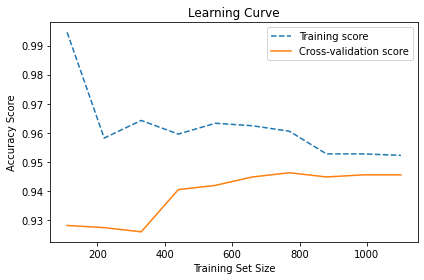

In [155]:
import numpy as np


# import matplotlib package for plots
import matplotlib.pyplot as plt
# Import learning_curve function from scikit-learn package
from sklearn.model_selection import learning_curve
# Crete data for learning curve
train_sizes, train_scores, test_scores = learning_curve(LogReg, X, y, cv=5, scoring ='accuracy',
train_sizes=np.linspace(.1, 1.0, 10))
# Create mean of train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve lines (mean of training and test scores)
plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean,  label="Cross-validation score")

# Add title and labels and show the plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line se

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line se

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number 

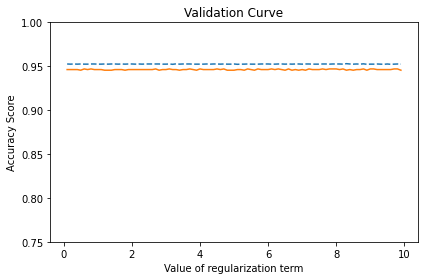

In [156]:
# Import validation_curve function from scikit-learn package
from sklearn.model_selection import validation_curve
# Define the range of parameter to be tested
param_range = np.arange(0.1,10,0.1)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(LogReg, X, y, param_name="C", param_range=param_range, cv=5, scoring="accuracy")


# Calculate mean for training and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot validation curve lines (mean of training and test scores)
plt.plot(param_range, train_mean, '--',label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")

# Add title and labels and show the plot
plt.title("Validation Curve")
plt.ylim([0.75, 1.0])
plt.xlabel("Value of regularization term")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

## SVC

In [157]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True)
for kernel in ['linear',  'rbf']:  #'poly',
    classifier = svm.SVC(gamma=0.001, kernel=kernel)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    print('For kernel {} the f1 score is: {}'.format(kernel, metrics.f1_score(y_test, predicted, average='micro')))

For kernel linear the f1 score is: 0.927536231884058
For kernel rbf the f1 score is: 0.9043478260869565


In [68]:
### Weird, this 'poly' doesn't work

# problem...
## https://github.com/scikit-learn/scikit-learn/issues/4648   ## This one shows its small + big values
## https://github.com/scikit-learn/scikit-learn/issues/13557


# from sklearn import svm, metrics
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, shuffle=True)
# for kernel in ['poly']:  #'poly',
#     classifier = svm.SVC(gamma=0.001, kernel=kernel)
#     classifier.fit(X_train, y_train)
#     predicted = classifier.predict(X_test)
#     print('For kernel {} the f1 score is: {}'.format(kernel, metrics.f1_score(y_test, predicted, average='micro')))

[2.97712228 3.12395623 2.61012424 3.45958633 2.66603488 2.43408022
 3.44291402 3.38703975 2.87609734 2.55554937]
[0.33903393 0.40015231 1.40381679 1.06302486 0.84000855 0.97635303
 0.07473577 0.80799624 1.24724885 1.44085882]
[2.86654123 2.0452851  2.60029954 2.92832168 3.00580561 3.48308986
 2.94285499 3.29268828 2.77883471 3.00088948]
[0.08130589 0.22572785 0.35641047 0.77502068 1.0519538  0.48493769
 1.14609417 1.25388218 0.7786176  1.03431899]


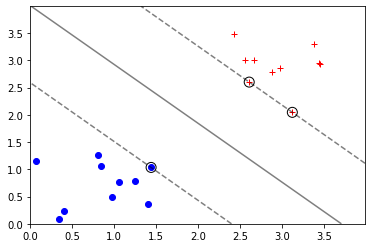

In [139]:
# Import required packages
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
# Import SVM classifier from Scikit-learn
from sklearn.svm import SVC
# Create mock data
p = [2,2] + 1.5*rnd.random((10,2))
n = [0,0] + 1.5*rnd.random((10,2))
# Train SVM
X_ = np.vstack((p,n))
y_ = np.hstack((10*[1],10*[-1]))

# Create Support Vector Classifier (SVC) object
clf = SVC(gamma='auto', kernel='linear')
# Fit an SVM model to the generated data
svm = clf.fit(X_,y_)
#Plot the training set and separating hyper-plane and support vectors
# plot data points

print(p[:,0])

print(n[:,0])


print(p[:,1])

print(n[:,1])


plt.plot(p[:,0], p[:,1], "+r")
plt.plot(n[:,0], n[:,1], "ob")
x = np.arange(0,4, 0.01)

YY, XX = np.meshgrid(x, x)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.savefig('support_vector.png')

## KNN

In [158]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_knn = sc.fit_transform(X)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size = 0.2, random_state = 20)

# Import k-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier

# Build a k-nearest neighbor object
knn = KNeighborsClassifier(n_neighbors = 2)

# Train(fit) model
knn.fit(X_train, y_train)

# Predict both training and test data with the fitted model
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

# Performance of the model
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_test_predict))

Accuracy of the model for training set: 0.965
Accuracy of the model for test set: 0.899



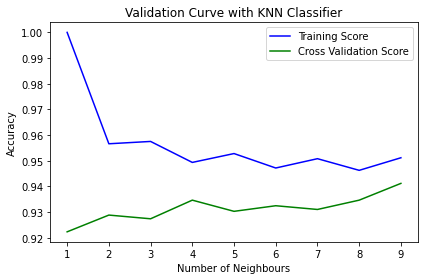

In [159]:
import numpy as np

# Import validation_curve function from scikit-learn package
from sklearn.model_selection import validation_curve
# Define the range of parameter to be tested
param_range = np.arange(1,10,1)
# Calculate accuracy on training and test set using range of parameter values
train_score, test_score = validation_curve(KNeighborsClassifier(), X, y, param_name = "n_neighbors", param_range=param_range, cv=5, scoring="accuracy")


# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(param_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(param_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')


plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

## PCA

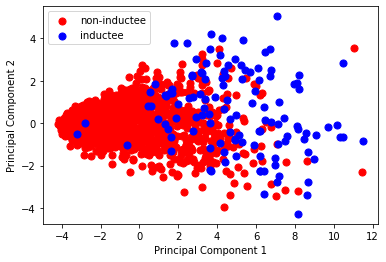

In [160]:
import matplotlib.pyplot as plt


# Import PCA
from sklearn.decomposition import PCA
# Import standar scaler from scikit-learn
from sklearn.preprocessing import StandardScaler


# Define number of classes in the data set
n_classes = 2

X_pca = StandardScaler().fit_transform(X)

# Create a PCA object
pca = PCA(n_components=2)
# Fit the model
principalComponents = pca.fit_transform(X_pca)
ReducedData = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Plot the data in two dimensions (PC1 and PC2)
fig = plt.figure() 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2')
# Define names for targets
TargetNames = ['non-inductee', 'inductee']
Colors = ['r', 'b']
for target, color in zip(range(n_classes),Colors):
    indicesToKeep = y == target
    ax.scatter(principalComponents[indicesToKeep, 0], principalComponents[indicesToKeep, 1], c = color, s = 50)
ax.legend(TargetNames)

## Naive Bayes

In [161]:
# Import required packages and functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Import Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
# Import Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
# Import Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Load data and split it to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=9)
# Creat Gaussian Naive Bayes object
gnb = GaussianNB()
# fit the model and predict test set
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Print accuracy
print("The accuracy of the Gaussian Naive Bayes on digits data is: %.3f" % (accuracy_score(y_test,y_pred)))
# Create Bernoulli Naive Bayes object
bnb = BernoulliNB()
# fit the model and predict test set
y_pred = bnb.fit(X_train, y_train).predict(X_test)
# print accuracy
print("The accuracy of the Bernoulli Naive Bayes on digits data is: %.3f" % (accuracy_score(y_test,y_pred)))
# Creat Multinomial Naive Bayes object
mnb = MultinomialNB()
# fit the model and predict test set
y_pred = mnb.fit(X_train, y_train).predict(X_test)
# print accuracy
print("The accuracy of the Multinomial Naive Bayes on digits data is: %.3f" % (accuracy_score(y_test,y_pred)))

The accuracy of the Gaussian Naive Bayes on digits data is: 0.872
The accuracy of the Bernoulli Naive Bayes on digits data is: 0.919
The accuracy of the Multinomial Naive Bayes on digits data is: 0.843


### 